In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ml_projects/ml_optimisation/"

Mounted at /content/gdrive


In [0]:
# enables inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# imports the required packages
from fastai.collab import *
from fastai.tabular import *
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# defines the data directory
data_dir = Path(root_dir + '/data/')
data_dir

PosixPath('/content/gdrive/My Drive/ml_projects/ml_optimisation/data')

In [174]:
# reads in the papers with code model data
model_data = pd.read_csv(data_dir/'pw_code_model_data.csv')

model_data.head()

,dataset,extradata,global_rank,metric_name,metric_value,model,remove,task,paper,paper_path,paper_url
0,IC15,NaN,# 10,F-Measure,75.61%,SegLink,-,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
1,SCUT-CTW1500,NaN,# 5,F-Measure,40.8%,SegLink,-,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
2,SNLI,NaN,# 36,% Test Accuracy,84.6,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
3,SNLI,NaN,# 44,% Train Accuracy,86.2,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
4,SNLI,NaN,# 1,Parameters,3.0m,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN


In [121]:
len(model_data)

5503

In [176]:
# lists the columns in the model_data dataframe
model_data.columns

Index(['dataset', 'extradata', 'global_rank', 'metric_name', 'metric_value',
       'model', 'remove', 'task', 'paper', 'paper_path', 'paper_url'],
      dtype='object')

## Data preprocessing

In [177]:
# remove all columns with NaN's
 model_data = model_data.dropna(axis=1, how='all')
  
 # drops the remove column
 model_data = model_data.drop('remove', 1)

# remove the hash from the global_rank column
model_data['global_rank'] = model_data['global_rank'].str.replace('#','')

# converts the global_rank column values to integers
model_data['global_rank'] = pd.to_numeric(model_data['global_rank'])

# remove rows where the metric_value is NaN
model_data = model_data.dropna(subset = ['metric_value'])

#
model_data = model_data[~model_data.metric_value.str.contains('-')]


len(model_data)

5425

In [178]:
# extracts the integer from the metric_value column
model_data['metric_value'] = model_data['metric_value'].str.extract('(\d+)').astype(int)

len(model_data)

5425

In [179]:
#
model_data.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
0,IC15,10,F-Measure,75,SegLink,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
1,SCUT-CTW1500,5,F-Measure,40,SegLink,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
2,SNLI,36,% Test Accuracy,84,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
3,SNLI,44,% Train Accuracy,86,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
4,SNLI,1,Parameters,3,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders


In [0]:
#
# model_data.loc[model_data['dataset'] == 'IC15']

In [0]:
# model_data.loc[model_data['dataset'] == 'SNLI']

In [128]:
#
# model_data = model_data.loc[model_data['global_rank'] == 1]

model_data.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
0,IC15,10,F-Measure,75,SegLink,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
1,SCUT-CTW1500,5,F-Measure,40,SegLink,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
2,SNLI,36,% Test Accuracy,84,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
3,SNLI,44,% Train Accuracy,86,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
4,SNLI,1,Parameters,3,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders


In [129]:
len(model_data)

5425

## Generating training and test data

In [130]:
# generates training and test dataframes
train_df, test_df = train_test_split(model_data, test_size = 0.2)

train_df.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
4170,Atari 2600 Double Dunk,4,Score,3,Bootstrapped DQN,Atari Games,Deep Exploration via Bootstrapped DQN,/paper/deep-exploration-via-bootstrapped-dqn
3512,Oxf105k,2,MAP,87,DIR+QE*,Image Retrieval,Deep Image Retrieval: Learning global represen...,/paper/deep-image-retrieval-learning-global
1936,Set5 - 4x upscaling,25,PSNR,30,ESPCN,Image Super-Resolution,Real-Time Single Image and Video Super-Resolut...,/paper/real-time-single-image-and-video-super
1494,Atari 2600 Kangaroo,18,Score,861,Prior+Duel hs,Atari Games,Deep Reinforcement Learning with Double Q-lear...,/paper/deep-reinforcement-learning-with-double-q
1326,MovieLens 1M,4,RMSE,0,GC-MC,Collaborative Filtering,Graph Convolutional Matrix Completion,/paper/graph-convolutional-matrix-completion


In [131]:
# 20% train vs test split
len(train_df), len(test_df)

(4340, 1085)

In [0]:
# 
procs = [FillMissing, Categorify, Normalize]

In [0]:
# # initialises an empty categorical vars
# cat_vars = ['dataset', 'metric_name', 'task']

# # initialises an empty categorical vars
# cat_vars = ['dataset', 'metric_name', 'task', 'paper', 'paper_path']

# # initialises an empty continuous vars
# cont_vars = ['global_rank', 'metric_value']

# # initialises an empty continuous vars
# # cont_vars = ['metric_value']
# cont_vars = []


# initialises an empty categorical vars
cat_vars = ['dataset', 'metric_name', 'task', 'paper', 'paper_path']

# initialises an empty continuous vars
cont_vars = ['global_rank', 'metric_value']

In [159]:
# dependent variable
dep_var = 'model'

# final dataframe
df_train = train_df[cat_vars + cont_vars + [dep_var]].copy()
# df_train = model_data[cat_vars + cont_vars + [dep_var]].copy()


# 
df_test = test_df[['dataset', 'task', 'metric_name']].copy()

df_train.head()

,dataset,metric_name,task,model
4170,Atari 2600 Double Dunk,Score,Atari Games,Bootstrapped DQN
3512,Oxf105k,MAP,Image Retrieval,DIR+QE*
1936,Set5 - 4x upscaling,PSNR,Image Super-Resolution,ESPCN
1494,Atari 2600 Kangaroo,Score,Atari Games,Prior+Duel hs
1326,MovieLens 1M,RMSE,Collaborative Filtering,GC-MC


In [160]:
# 
df_test.head()

,dataset,task,metric_name
1420,Atari 2600 Berzerk,Atari Games,Score
1913,BSD100 - 4x upscaling,Image Super-Resolution,PSNR
1893,PASCAL VOC 2007,Object Detection,MAP
2585,WIDER Face (Easy),Face Detection,AP
4016,Cityscapes,Real-Time Semantic Segmentation,Frame (fps)


In [161]:
#
valid_idx = range(len(df_test))

# valid_idx = range(len(model_data)-2000, len(model_data))

valid_idx

range(0, 1085)

In [162]:
dep_var

'model'

In [163]:
len(model_data)

model_names = model_data['model'].to_list()

model_names = list(dict.fromkeys(model_names))

model_names[:5]

['SegLink',
 '300D NSE encoders',
 '300D MMA-NSE encoders with attention',
 'Neural Semantic Encoder',
 'MMA-NSE attention']

In [0]:
# databunch generation
data = (TabularList.from_df(df_train, path = data_dir, cat_names = cat_vars, cont_names = cont_vars, procs = procs)
                .split_by_idx(valid_idx)
                
                
                 # label_cls = FloatList informs fastai that this is a regression problem
                 # log due to RMSE 
                .label_from_df(cols = dep_var, classes = model_names)
        
                .add_test(TabularList.from_df(df_test, path = data_dir, procs = procs, cat_names = cat_vars, cont_names = cont_vars))
                .databunch(bs = 528))

In [165]:
# displays 5 random rows from the databunch
data.show_batch(rows = 5)

dataset,metric_name,task,target
WikiBio,ROUGE,Table-to-text Generation,Field-gating Seq2seq + dual attention
Set5 - 4x upscaling,PSNR,Image Super-Resolution,DnCNN-3
Penn Treebank (Word Level),Validation perplexity,Language Modelling,Transformer-XL
MSU-MFSD,Equal Error Rate,Face Anti-Spoofing,GFA-CNN
SQuAD1.1,EM,Question Answering,Match-LSTM with Ans-Ptr (Boundary) (ensemble)


## Learner generation

In [0]:
#
learn = tabular_learner(data, layers=[200,100],
                        ps=[0.001, 0.01],
                        metrics = accuracy)

In [167]:
# describes the learner
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(541, 54)
    (1): Embedding(216, 32)
    (2): Embedding(205, 32)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=118, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=100, out_features=1741, bias=True)
  )
)

In [168]:
# finds the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


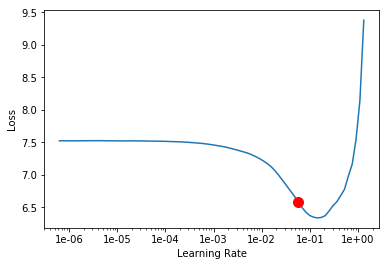

In [169]:
# 
learn.recorder.plot(suggestion = True)

In [170]:
#
learn.fit_one_cycle(1, 1E-02)

epoch,train_loss,valid_loss,accuracy,time
0,7.348275,7.447834,0.013825,00:00


In [0]:
#
learn.unfreeze()

In [172]:
#
# learn.fit(10, 1E-02)
learn.fit(10, 1E-02, wd = 1e-25) 
# 0.987219	acc = 0.710918 bs = 528

epoch,train_loss,valid_loss,accuracy,time
0,6.625830,7.305344,0.013825,00:00
1,5.942717,6.831958,0.009217,00:00
2,5.323800,6.510143,0.006452,00:00
3,4.772054,6.185671,0.042396,00:00
4,4.306494,5.742141,0.058065,00:00
5,3.924761,5.366555,0.050691,00:00
6,3.622655,5.433406,0.048848,00:00
7,3.385242,5.885892,0.047926,00:00
8,3.199639,6.307744,0.049770,00:00
9,3.048821,6.584983,0.049770,00:00


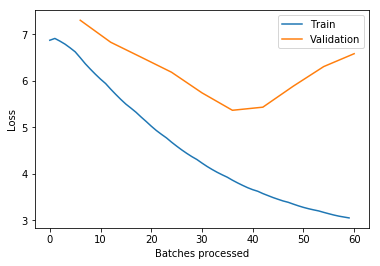

In [173]:
#
learn.recorder.plot_losses()

## Testing the model

In [82]:
#
df_test.iloc[1]

dataset                      COCO
metric_name         Validation AP
task           Keypoint Detection
Name: 147, dtype: object

In [84]:
# test
learn.predict(df_test.iloc[1])

(Category HRNet-48,
 tensor(22),
 tensor([2.4402e-04, 4.9331e-04, 9.7683e-05, 6.5871e-04, 2.3862e-03, 7.3156e-06,
         5.5661e-06, 6.5626e-04, 4.6988e-04, 2.2406e-03, 7.8294e-06, 9.8516e-05,
         6.2846e-06, 7.3113e-06, 3.4861e-04, 6.2699e-04, 8.0675e-06, 2.1109e-04,
         2.1691e-03, 7.5758e-06, 4.8465e-06, 8.5198e-06, 2.2654e-01, 4.5794e-03,
         6.1623e-06, 6.1275e-06, 7.9438e-06, 5.6683e-06, 4.4178e-04, 1.0366e-04,
         3.3134e-04, 3.9676e-04, 1.0593e-04, 1.8316e-04, 6.7384e-03, 4.5366e-06,
         2.1684e-04, 8.7996e-06, 3.0364e-04, 1.4105e-04, 4.8516e-04, 2.1182e-04,
         5.5845e-06, 4.8987e-06, 1.6452e-04, 1.4788e-03, 4.5883e-04, 3.1822e-03,
         7.9051e-04, 8.2710e-04, 5.9533e-06, 4.3355e-04, 3.6569e-03, 6.7447e-04,
         1.9763e-03, 1.0107e-03, 2.9689e-04, 2.9800e-04, 4.9018e-06, 6.3948e-06,
         3.0411e-03, 1.0005e-05, 2.3040e-03, 1.2392e-02, 9.4895e-06, 8.4471e-06,
         8.9277e-06, 7.1675e-04, 7.2052e-03, 1.1481e-04, 2.4973e-03, 1.9960e

In [81]:
#
test_df.iloc[1]

dataset                                                      COCO
global_rank                                                     1
metric_name                                         Validation AP
metric_value                                                   76
model                                                    HRNet-48
task                                           Keypoint Detection
paper           Deep High-Resolution Representation Learning f...
paper_path      /paper/deep-high-resolution-representation-lea...
Name: 147, dtype: object